# Food Delivery Cost and Profitability Analysis

<a href="https://drive.google.com/drive/u/1/folders/1AUq-ZUWuY3IkzBd5Yj02BGtXEll6kVZU">DATA</a>

In [2]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore') # pembe çıkan uyarıları kaldırdık 

In [4]:
df=pd.read_csv('food_orders_new_delhi.csv')

### EDA

In [6]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [7]:
df.shape

(1000, 12)

In [8]:
df.corr(numeric_only=True)

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,1.000000,-0.027407,-0.033658,-0.050792,-0.006567,0.011442
Order Value,-0.027407,1.000000,-0.003069,-0.072880,0.025589,-0.020607
Delivery Fee,-0.033658,-0.003069,1.000000,0.012221,-0.036054,0.016720
Commission Fee,-0.050792,-0.072880,0.012221,1.000000,-0.023755,-0.007738
Payment Processing Fee,-0.006567,0.025589,-0.036054,-0.023755,1.000000,-0.006152
Refunds/Chargebacks,0.011442,-0.020607,0.016720,-0.007738,-0.006152,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [10]:
df.tail()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0
999,1000,C4335,R2890,2024-01-08 14:46:43,2024-01-08 15:39:43,1657,20,Digital Wallet,15% New User,180,27,100


In [11]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [12]:
df["Discounts and Offers"].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

In [13]:
# Mod ile doldurma
mode_value = df['Discounts and Offers'].mode()[0]
df['Discounts and Offers'] = df['Discounts and Offers'].fillna(mode_value)

In [14]:
df.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

<Axes: >

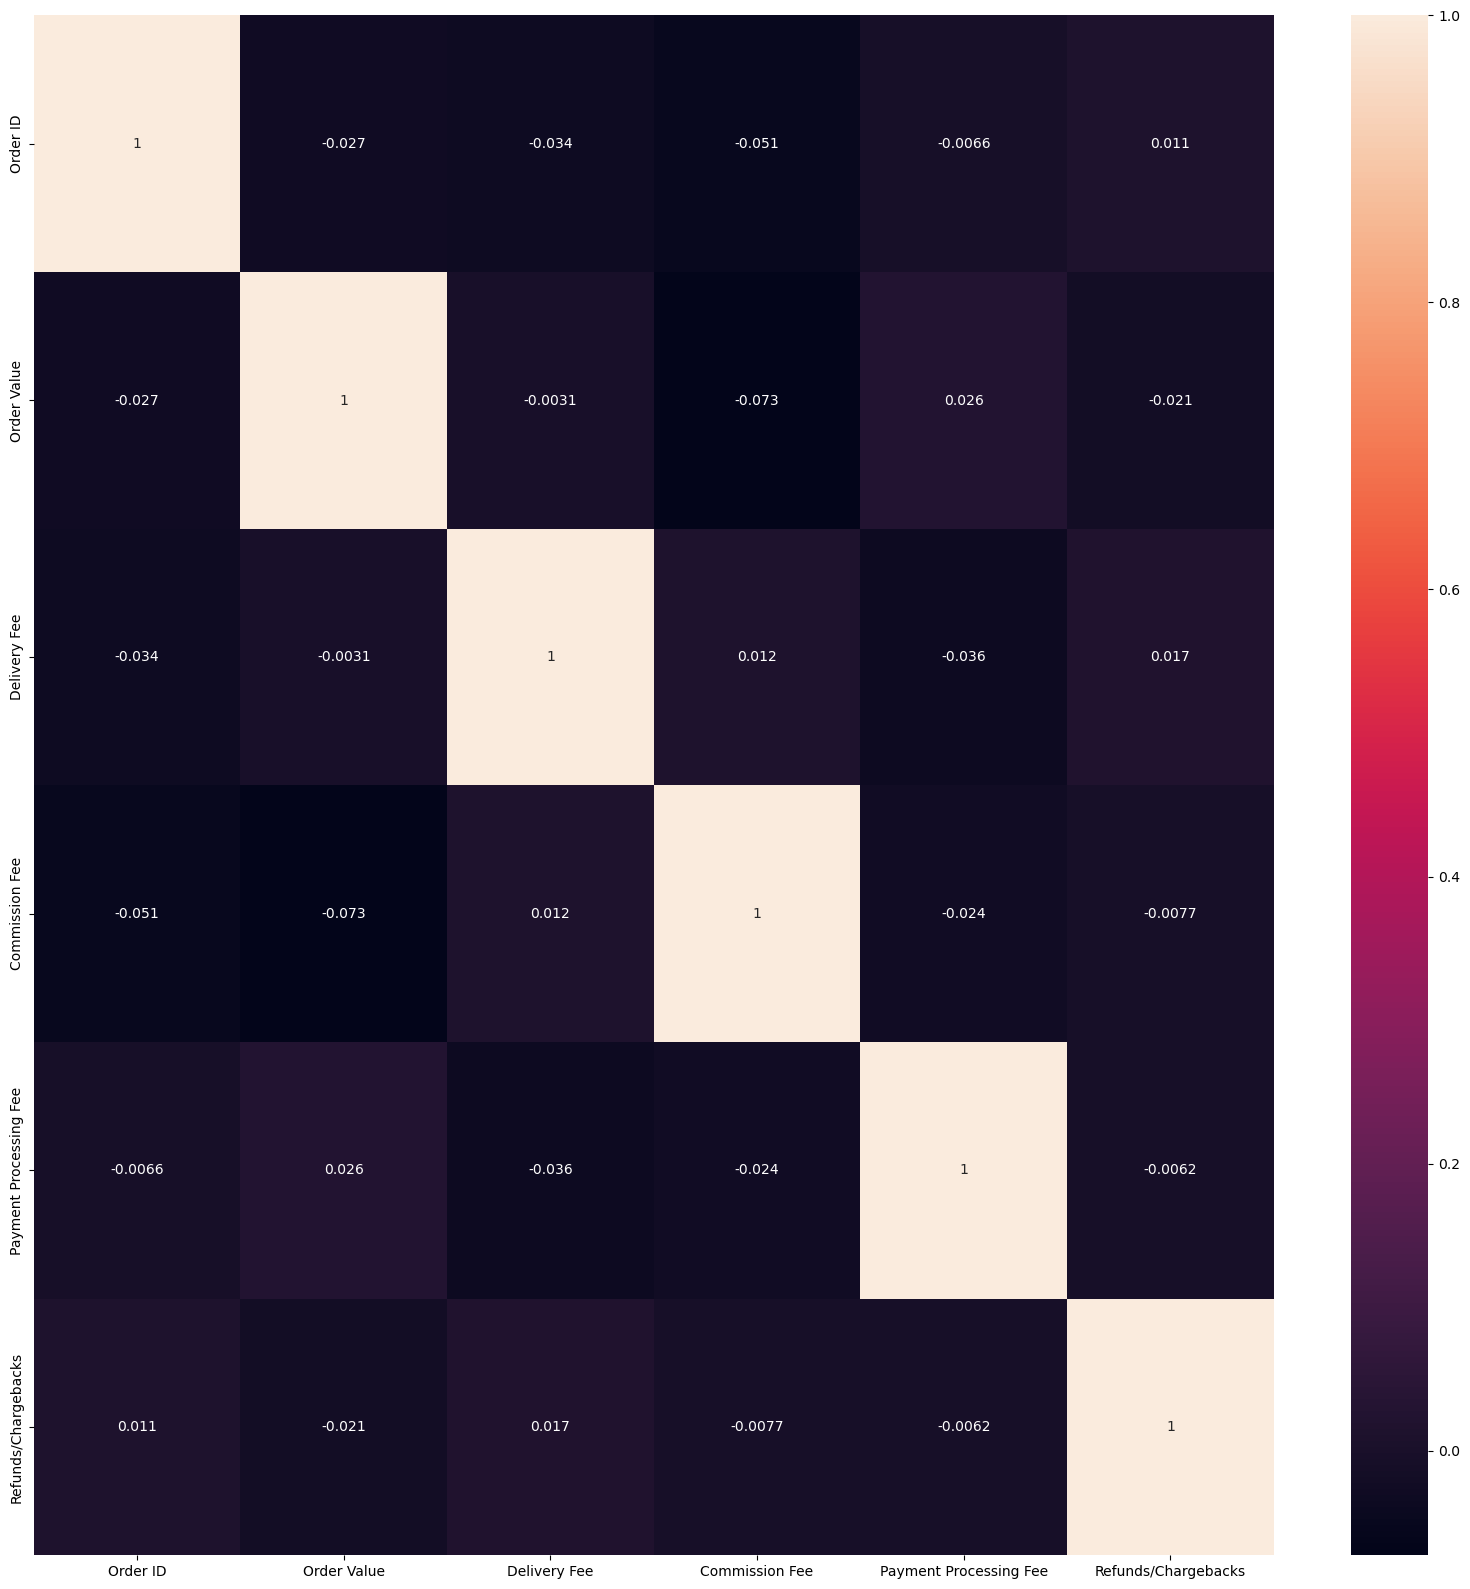

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [16]:
df.columns.tolist()

['Order ID',
 'Customer ID',
 'Restaurant ID',
 'Order Date and Time',
 'Delivery Date and Time',
 'Order Value',
 'Delivery Fee',
 'Payment Method',
 'Discounts and Offers',
 'Commission Fee',
 'Payment Processing Fee',
 'Refunds/Chargebacks']

In [17]:
abs(df.corr(numeric_only=True)['Order Value'].sort_values(ascending=False))

Order Value               1.000000
Payment Processing Fee    0.025589
Delivery Fee              0.003069
Refunds/Chargebacks       0.020607
Order ID                  0.027407
Commission Fee            0.072880
Name: Order Value, dtype: float64

<Axes: xlabel='Order ID'>

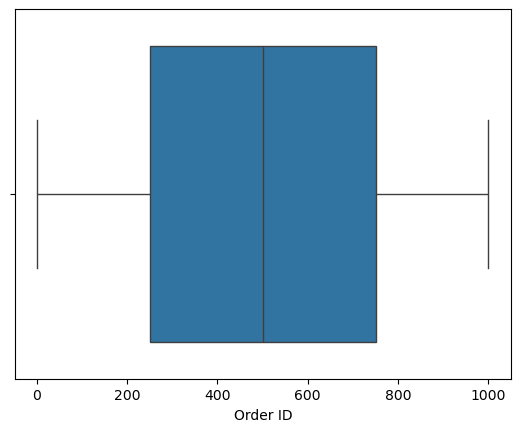

In [18]:
sns.boxplot(x=df['Order ID'])  #outliers değeleri bulduk 

In [19]:
df.shape

(1000, 12)

In [20]:
### Gelir Analizi

In [21]:
toplam_gelir = df['Order Value'] + df['Delivery Fee']

In [22]:
### Kârlılık Analizi

In [23]:
df['Customer ID'] = df['Customer ID'].str.replace('C', '').astype(float)

In [24]:
df['Restaurant ID'] = df['Restaurant ID'].str.replace('R', '').astype(float)

In [25]:
d={"10%":0,"50 off Promo":1,"15% New User":2,"5% on App":3};df["Discounts and Offers"]=df["Discounts and Offers"].map(d)

In [26]:
toplam_maliyetler = df['Delivery Fee'] + df['Commission Fee'] + df['Payment Processing Fee'] + df['Discounts and Offers'] + df['Refunds/Chargebacks']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order ID                1000 non-null   int64  
 1   Customer ID             1000 non-null   float64
 2   Restaurant ID           1000 non-null   float64
 3   Order Date and Time     1000 non-null   object 
 4   Delivery Date and Time  1000 non-null   object 
 5   Order Value             1000 non-null   int64  
 6   Delivery Fee            1000 non-null   int64  
 7   Payment Method          1000 non-null   object 
 8   Discounts and Offers    1000 non-null   int64  
 9   Commission Fee          1000 non-null   int64  
 10  Payment Processing Fee  1000 non-null   int64  
 11  Refunds/Chargebacks     1000 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 93.9+ KB


In [28]:
df['Discounts and Offers'].value_counts()

Discounts and Offers
0    418
1    201
2    198
3    183
Name: count, dtype: int64

In [29]:
Kâr= toplam_gelir - toplam_maliyetler

In [30]:
x=df.drop(['Delivery Fee','Commission Fee','Payment Processing Fee','Discounts and Offers','Refunds/Chargebacks'], axis=1)

In [31]:
#y=df[['Order Value','Delivery Fee']]

In [32]:
y=df[['Order Value']]

In [33]:
x=pd.get_dummies(x,drop_first=True)

### Modelling

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [36]:
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
tahmin=lr.predict(x_test)

In [39]:
r2_score(y_test,tahmin) 

0.9999999999999999

In [40]:
mean_squared_error(y_test,tahmin)**.5

4.148656528171483e-06

In [41]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [42]:
Rmodel=R.fit(x_train,y_train)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [44]:
algo_test(x,y) 	##R_Squared=başarı oaranı RMSE=karesini alıp karekökünü alıyor RMSE=mutlar değerini alıyor

,R_Squared,RMSE,MAE
Lasso,0.999957,3.213101,2.711550
Decision Tree,0.999931,4.079216,2.740000
Gradient Boosting,0.999927,4.198991,3.052846
Extra Tree,0.999803,6.896013,4.125000
XGBRegressor,0.999773,7.409771,5.433516
Linear,0.999140,14.419026,12.131916
SGD,0.999076,14.950374,12.597821
Ridge,0.998009,21.940835,18.491074
KNeighborsRegressor,0.989373,50.691349,43.471606
AdaBoost,0.877631,172.014316,140.791000


In [100]:
feature_importance=pd.DataFrame({'Order Value':x_train.columns,'Commission Fee':lr.coef_[0]})

In [102]:
feature_importance=feature_importance.sort_values(by='Commission Fee', ascending=False)

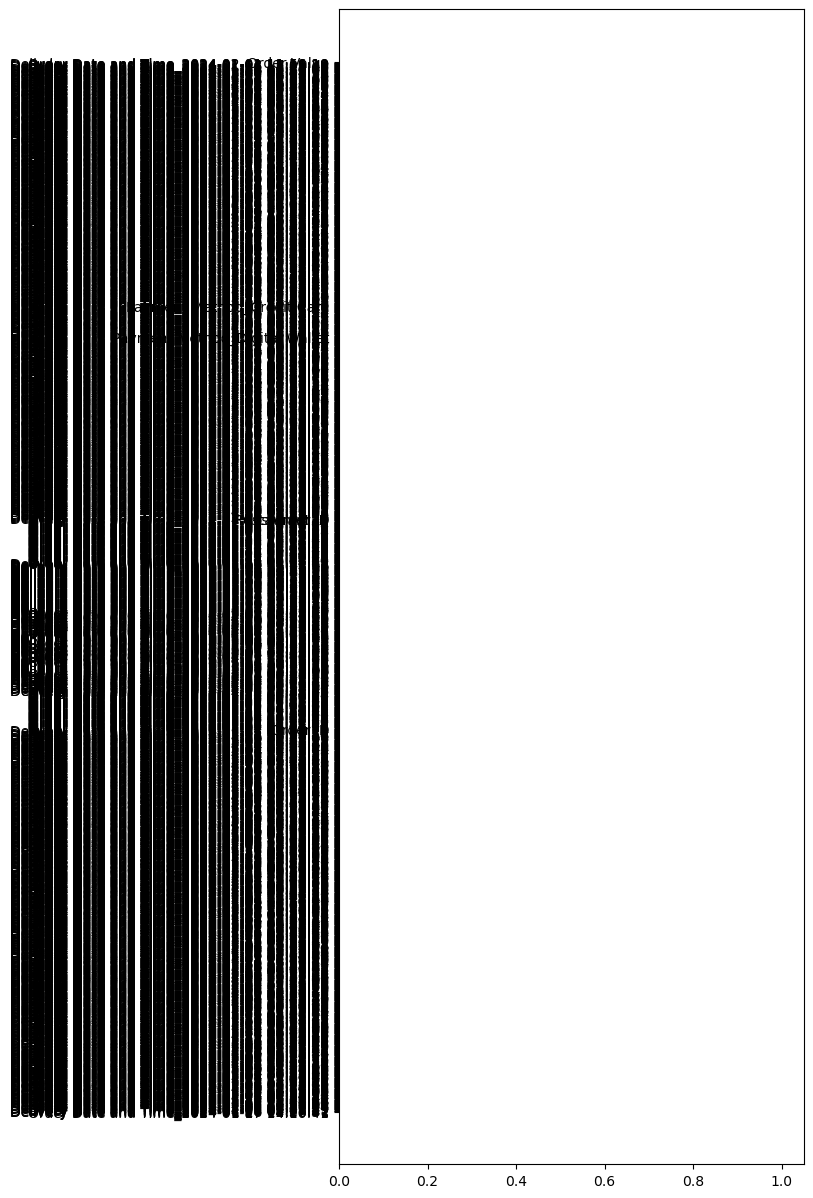

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Order Value'],feature_importance['Commission Fee'])
plt.gca().invert_yaxis()

In [106]:
residuals=y_test-tahmin 

<Axes: xlabel='Order Value', ylabel='Density'>

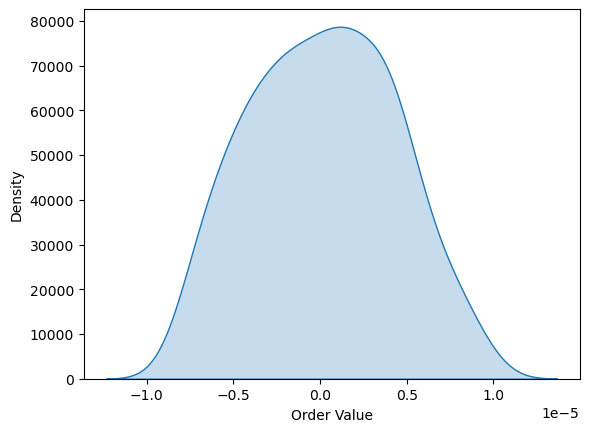

In [110]:
sns.kdeplot(x=residuals['Order Value'], fill=True)

In [112]:
from yellowbrick.regressor import ResidualsPlot

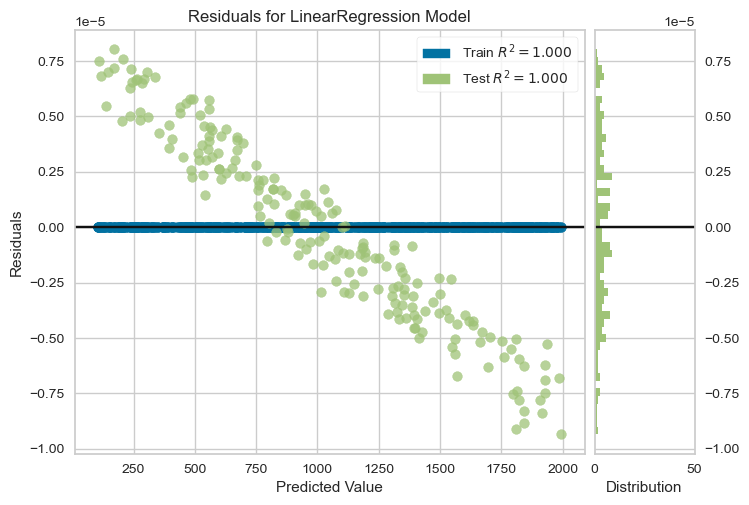

In [114]:
vis=ResidualsPlot(lr)
vis.fit(x_train,y_train)
vis.score(x_test,y_test)
vis.show()
plt.show()